# Load data

In [1]:
import numpy as np
from matplotlib import pyplot as plt


import _pickle as cPickle
import bz2

def decompress_pickle(file):
    """Decompresses and loads pickled dataset"""
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data


def load_dataset_part(path):
    """Load a part of the dataset stored in one file. Scale the results to fit in the 0--1 range."""
    s = decompress_pickle(path)
    X = np.dstack(s)
    X[:, :3, :] = (X[:, :3, :] + 4) / 8
    X[:, 3:, :] = (X[:, 3:, :] * 1000 + 2000) / 4000

    return np.transpose(X, [2, 0, 1])


def load_3_sensor_dataset(filename):
    X_wrist = load_dataset_part(f'{filename}_wrist.pbz2')
    X_shin = load_dataset_part(f'{filename}_tibia.pbz2')
    X_shoe = load_dataset_part(f'{filename}_shoe.pbz2')

    return X_wrist, X_shin, X_shoe

def load_2_sensor_dataset(filename1, filename2):
    X_wrist = load_dataset_part(f'{filename1}.pbz2')
    X_2 = load_dataset_part(f'{filename2}.pbz2')

    return X_wrist, X_2


def wrist2tibia_dataset_numpy():
    X_wrist1, X_shin1, X_shoe1 = load_3_sensor_dataset('data/test1')
    X_wrist2, X_shin2 = load_2_sensor_dataset('data/test2_wrist', 'data/test2_tibia')
    X_wrist3, X_shin3, _ = load_3_sensor_dataset('data/test5')

    X_wrist = np.vstack([X_wrist1, X_wrist2, X_wrist3])
    X_shin = np.vstack([X_shin1, X_shin2, X_shin3])

    return (X_wrist, X_shin)


def wrist2shoe_dataset_numpy():
    X_wrist1, _, X_shoe1 = load_3_sensor_dataset('data/test1')
    X_wrist2, X_shoe2 = load_2_sensor_dataset('data/test3_wrist', 'data/test3_shoe')
    X_wrist3, X_shoe3 = load_2_sensor_dataset('data/test4_wrist', 'data/test4_shoe')
    X_wrist4, _, X_shoe4 = load_3_sensor_dataset('data/test5')

    X_wrist = np.vstack([X_wrist1, X_wrist2, X_wrist3, X_wrist4])
    X_shoe = np.vstack([X_shoe1, X_shoe2, X_shoe3, X_shoe4])

    return (X_wrist, X_shoe)


In [2]:
(X_wrist, X_shoe) = wrist2shoe_dataset_numpy()

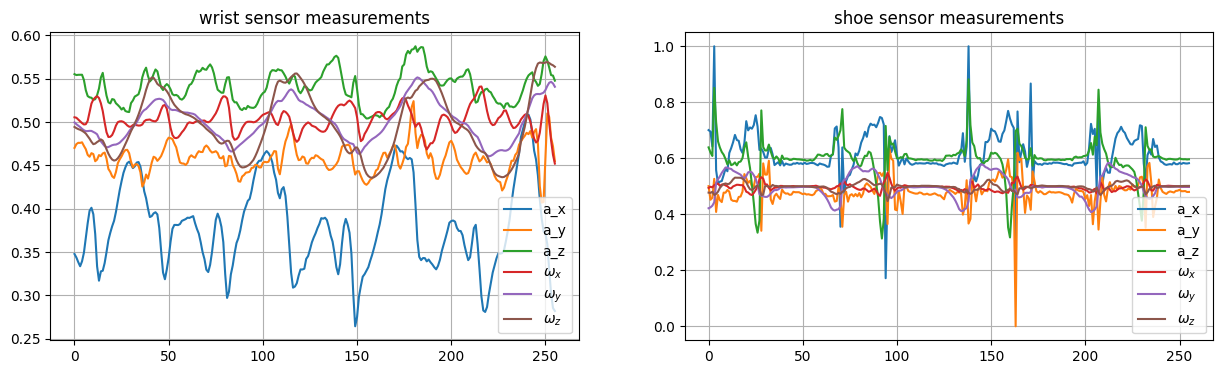

In [3]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ax1.set_title('wrist sensor measurements')
ax1.plot(X_wrist[0], label=['a_x', 'a_y', 'a_z', '$\omega_x$', '$\omega_y$', '$\omega_z$'])
ax1.legend()
ax1.grid()

ax2.set_title('shoe sensor measurements')
ax2.plot(X_shoe[0], label=['a_x', 'a_y', 'a_z', '$\omega_x$', '$\omega_y$', '$\omega_z$'])
ax2.legend()
ax2.grid()

In [4]:
(X_wrist, X_tibia) = wrist2tibia_dataset_numpy()

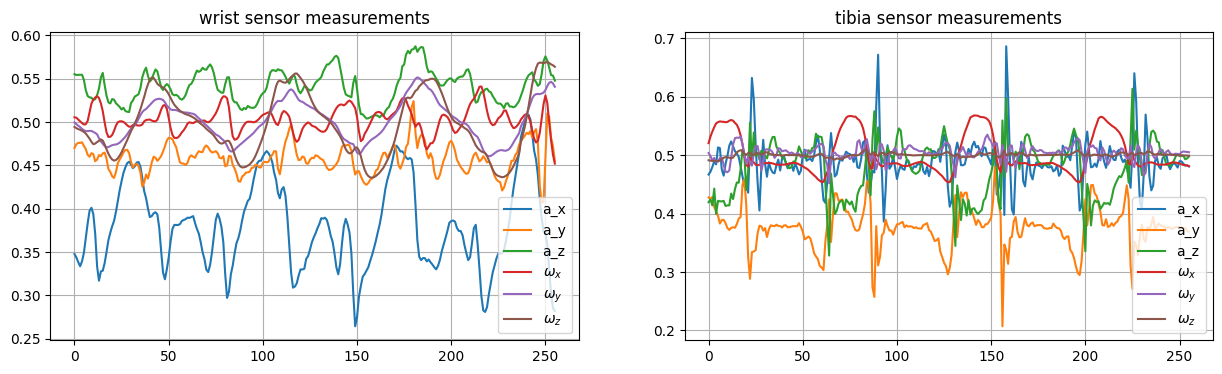

In [5]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ax1.set_title('wrist sensor measurements')
ax1.plot(X_wrist[0], label=['a_x', 'a_y', 'a_z', '$\omega_x$', '$\omega_y$', '$\omega_z$'])
ax1.legend()
ax1.grid()

ax2.set_title('tibia sensor measurements')
ax2.plot(X_tibia[0], label=['a_x', 'a_y', 'a_z', '$\omega_x$', '$\omega_y$', '$\omega_z$'])
ax2.legend()
ax2.grid()